# **Credit Card Fraud Detection**


**EDA**

Time : number of seconds elapsed between this transaction and the first transaction of the dataset.

V1, V2...V28 are the features that cannot be defined because of confidentiality issues obtained with PCA.

Amount: transaction amount

Class: response variable for if the transaction if fraud (1) or not (0)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

The creditcard dataset has 284,807 rows (transactions) and 31 columns with 'V1' - 'V28' being features and 'Class' being the target variable.

In [3]:
#Load Dataset
creditcard = pd.read_csv('creditcard.csv')

#Display first few rows
creditcard.head()

#Information on Data
creditcard.info()

#Describe Dataset
creditcard.describe()

#Shape
print("Number of rows and Columns:", creditcard.shape)

#Identify types
creditcard.dtypes

#Drop Columns
#creditcard.drop('Time', axis=1, inplace=True)
#creditcard.drop('Amount', axis=1, inplace=True)

#Check for missing values

#features and target variables
x = creditcard.drop(columns='Class', axis=1)
y = creditcard['Class']




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Use a sns heatmap to show the correlation between all the features

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.12

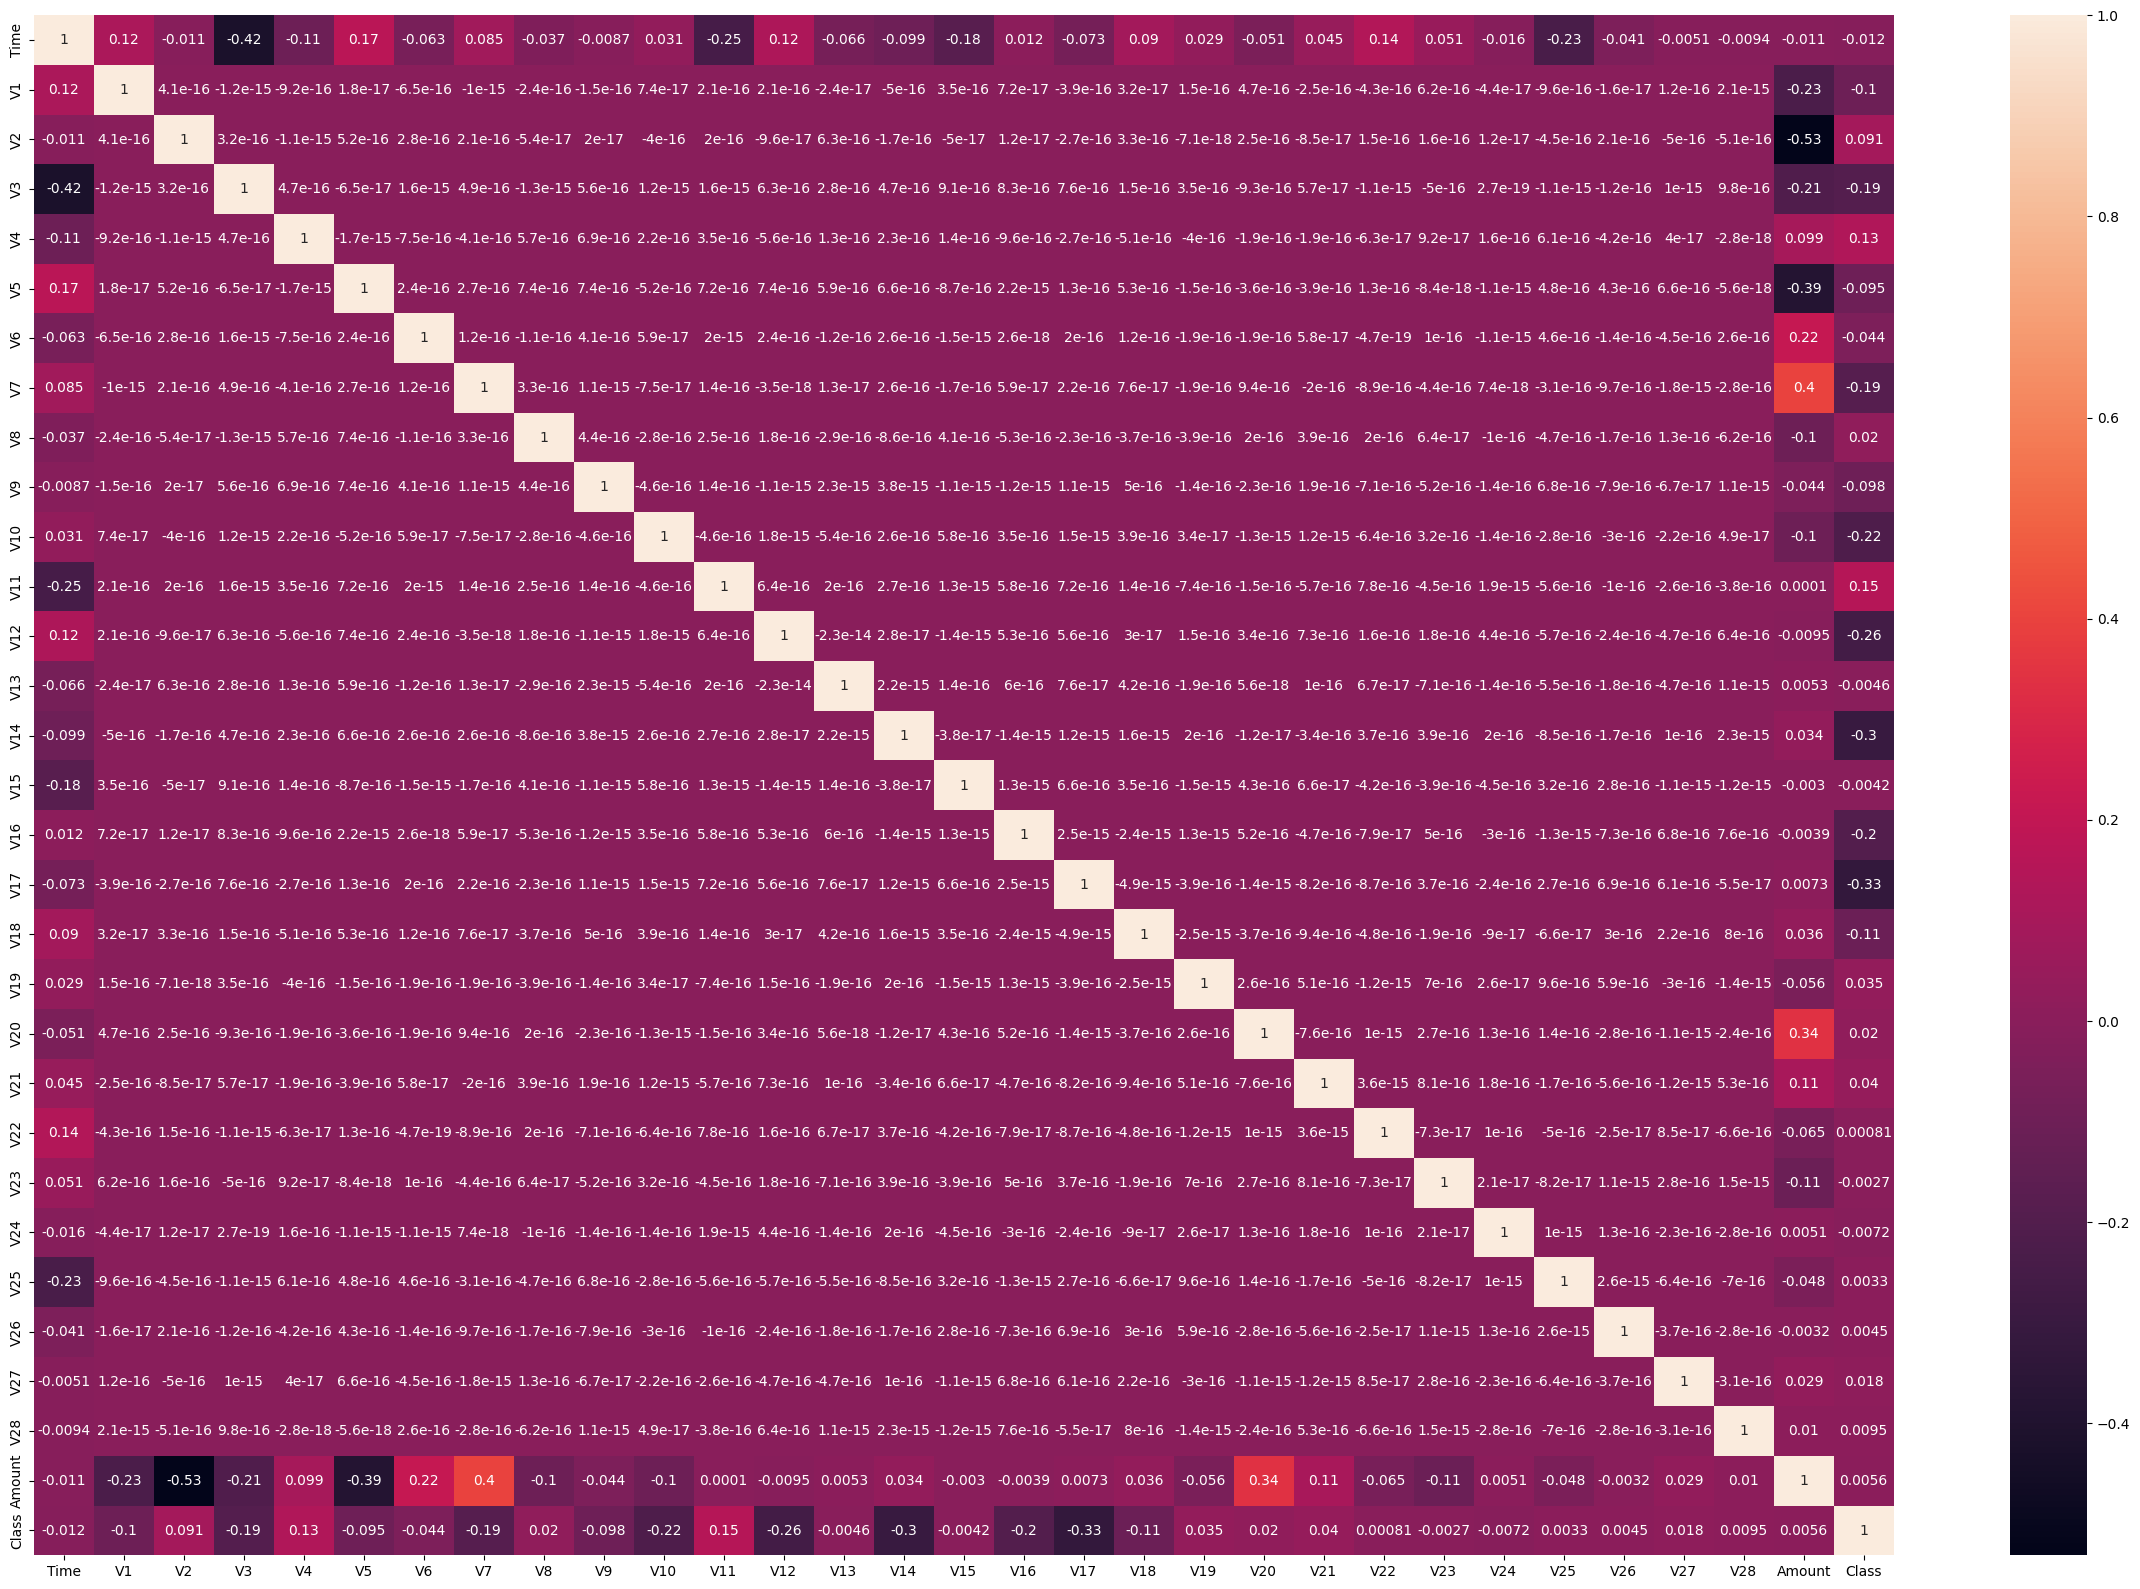

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
V1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
V2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
V3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
V4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
V5,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
V6,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
V7,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
V8,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
V9,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [4]:
#Feature pairwise
corr_credit = creditcard.corr()
print(corr_credit)

plt.figure(figsize=(30,20))
sns.heatmap(corr_credit, annot=True)
plt.show()

#Identify highly correlated features
abs(corr_credit.corr()) > 0.7

The data is highly inbalanced and has outliers in the Amount and Time variables

Amount Stats:  count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64
Time Stats:  count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


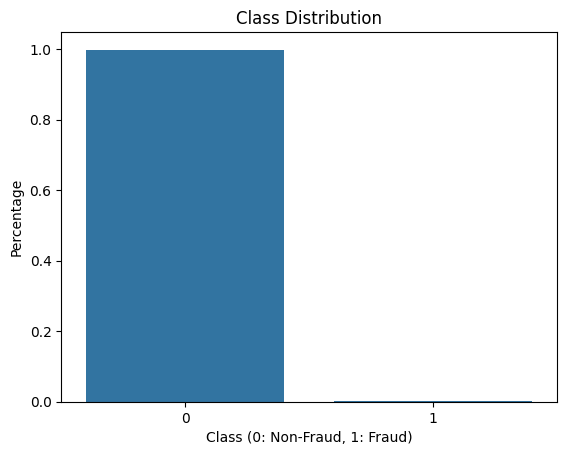

In [5]:
#Check for Ouliers in Amount and Time
amount_stats = creditcard['Amount'].describe()
time_stats = creditcard['Time'].describe()
print("Amount Stats: ",  amount_stats)
print("Time Stats: ",  time_stats)

#Check for class imbalance
#Check Class distribution
class_distribution = creditcard['Class'].value_counts(normalize = True)

#Display Class Distribution
class_distribution_plot = sns.barplot(x = class_distribution.index, y = class_distribution.values)
class_distribution_plot.set_title('Class Distribution')
class_distribution_plot.set_xlabel('Class (0: Non-Fraud, 1: Fraud)')
class_distribution_plot.set_ylabel('Percentage')
plt.show()


Find the outliers by visualizing a boxplot. Normalize the Amount and Time variables using the MinMaxScalar

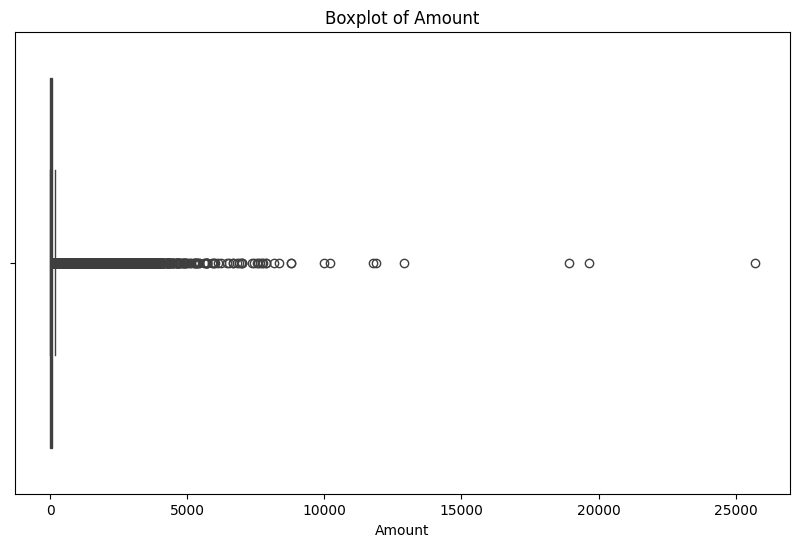

In [6]:
#Handle Outliers in Amount
plt.figure(figsize=(10,6))
sns.boxplot(x=creditcard['Amount'])
plt.title('Boxplot of Amount')
plt.show()

#Normalize Amount and Time columns using Min-Max Scalar
scalar = MinMaxScaler()
creditcard['Amount'] = scalar.fit_transform(creditcard[['Amount']])
creditcard['Time'] = scalar.fit_transform(creditcard[['Time']])


The outcome of Amount and Time after scaling, so now the values are in the range of [0,1].

In [7]:
#Summary Stats after scaling
scaled_amount = creditcard['Amount'].describe()
scaled_time = creditcard['Time'].describe()
print("Scaled Amount Stats: ", scaled_amount)
print("Scaled Time Stats: ", scaled_time)

Scaled Amount Stats:  count    284807.000000
mean          0.003439
std           0.009736
min           0.000000
25%           0.000218
50%           0.000856
75%           0.003004
max           1.000000
Name: Amount, dtype: float64
Scaled Time Stats:  count    284807.000000
mean          0.548717
std           0.274828
min           0.000000
25%           0.313681
50%           0.490138
75%           0.806290
max           1.000000
Name: Time, dtype: float64


Plot the distribution of selected features using a histogram to detect any patterns

Identify features most strongly correlated with the target variable (Class) which can help in feature selection.

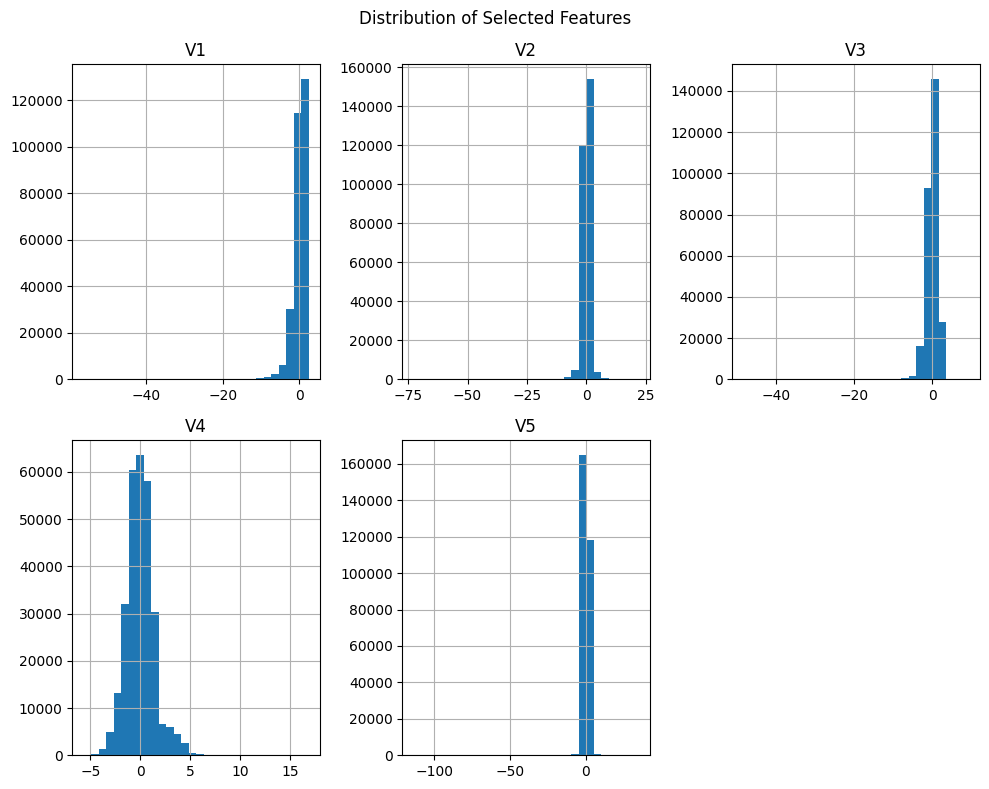

Top Positive Correlations: Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

Top Negative Correlations: V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


In [8]:
#Plot Distributions for a subset of features
subset_features=['V1', 'V2', 'V3', 'V4', 'V5']
creditcard[subset_features].hist(figsize=(10,8), bins= 30, layout = (2,3))
plt.suptitle('Distribution of Selected Features')
plt.tight_layout()
plt.show()

#Check Correlation of features with Class
correlations = creditcard.corr()['Class'].sort_values(ascending=False)
top_pos_corr = correlations.head(10)
top_neg_corr = correlations.tail(5)
print("Top Positive Correlations:", top_pos_corr)
print("\nTop Negative Correlations:", top_neg_corr)



##**Observations**

**Dataset Overview:**

284,807 transactions (rows)

31 features (columns)

This dataset includes all numerical variables that has floats for all the features, and the class is an integer.

**Initial Obersvations:**

The dataset has anonymous features named 'V1', ..., 'V28' for confidentiality.

There are no missing values as every column contains 284,807 non-null values.

Our target variable is 'Class' which tells us whether the transaction is fraudulent or not

**Findings**
The class distribution is highly unbalanced

Class 0 (Non-Fraud) ~ 99.83%

Class 1 (Fraud) ~ 0.17%

Transaction Amount Statitics has extreme values meaning it needs outlier handling or scaling.

Transaction Time has a wide range meaning it needs normalization.

**Post Normalization & Pre-Processing**

After scaling Amount and Time, our values now range from 0-1

**Feature Distribution**

After selecting the first 5 features, they showed a centered distribution, but some are skewed.

The visual plot showed that there are some outliers and variability.

**Correlation**

Our class variable has a weak positve correlation with the V11 feature, showing us that V11 is a stronger predictor of fraudulent transactions than the other features.

The top positively correlated features with the target variable (Class) were :

'V11' : 0.1549,

'V4' : 0.1334,

'V2' : 0.0913.

The top negatively correlated features with Class were :    

'V17' : -0.3265,

'V14' : -0.3025,

'V12' : -0.2606,

'V10' : -0.2169,

'V16' : -0.1965

AI was used to help normalize and scale features

**Model Selection & Training**

In [9]:
#Select features that are highly correlated with 'Class'
selected_features = ['V11', 'V4', 'V2']
x = creditcard[selected_features]
y = creditcard['Class']

V11, V4, and V2 were the most highly correlated features with Class, so I chose those as my selected features.

In [11]:
#Scale x and y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

(x_train_scaled.shape, x_test_scaled.shape, y_train.shape, y_test.shape)

((199364, 3), (85443, 3), (199364,), (85443,))

I needed to scale my x and y to enhance my model performance

In [13]:
#Class Imbalance

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report

#Using SMOTE, I can balance my dataset to 0.50/0.50

smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x, y)

#Divide into testing and training data, stratify keeps the 50/50 class balance
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42, stratify= y_smote)

#Use a Random Forest Classifier to improve predictive performance and reduce overfitting

rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(x_train_smote, y_train_smote)

#Make Predictions
y_pred_smote = rf_model_smote.predict(x_test_smote)

print("Classification Report for SMOTE-Resampled Data:")
print(classification_report(y_test_smote, y_pred_smote))
print("Confusion Matrix: ")
print(confusion_matrix(y_test_smote, y_pred_smote))





Classification Report for SMOTE-Resampled Data:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.99      1.00      0.99     85294

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589

Confusion Matrix: 
[[84441   854]
 [  388 84906]]


Since my data was highly imbalanced (0.93/0.17), I balanced it using SMOTE, a oversampling technique to generate synthetic samples for the minority class. Now the data is balanced 0.50/0.50

In [15]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

#Create a Logistic Regression Model and Train it
logreg = LogisticRegression(class_weight='balanced', random_state= 42, max_iter = 1000)
logreg.fit(x_train_smote, y_train_smote)

#Make Predictions
y_pred_logreg = logreg.predict(x_test_smote)

#Calculate probabilities
y_prob_logreg = logreg.predict_proba(x_test_smote)[:,1]

#Generate classification report
report_logreg = classification_report(y_test_smote, y_pred_logreg)

#Calculate AUC score
auc_logreg = roc_auc_score(y_test_smote, y_prob_logreg)

print("Classification Report \n",report_logreg)
print("AUC score", auc_logreg)

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     85295
           1       0.94      0.88      0.91     85294

    accuracy                           0.92    170589
   macro avg       0.92      0.92      0.92    170589
weighted avg       0.92      0.92      0.92    170589

AUC score 0.960556041763819


Using the Logistic Regression on the resampled data, we can see that:

Class 0 (No Fraud):

- Precision : 0.89

- Recall : 0.95

- F1 Score : 0.92

Class 1 (Fraud):

- Precision : 0.94

- Recall :0.88

- F1 Score : 0.91

The AUC score is 0.96

In [16]:
print('Accuracy Score:')
print(f"Train Accuracy: {logreg.score(x_train_smote, y_train_smote)}")
print(f"Test Accuracy: {logreg.score(x_test_smote, y_test_smote)}")

Accuracy Score:
Train Accuracy: 0.9150790998917196
Test Accuracy: 0.9150883116730856


In [19]:
#XGB Classifier

from xgboost import XGBClassifier

#Create the XBG Classifier

xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 4, min_child_rate = 3,
                      subsample = 0.7, colsample_bytree = 0.7, gamma =1, reg_alpha = 2, reg_lambda = 2)

xgb_model.fit(x_train_smote, y_train_smote)

y_pred_xgb = xgb_model.predict(x_test_smote)
y_pred_prob_xgb = xgb_model.predict_proba(x_test_smote)[:,1]

print("Classification Report for XGB Classifier:")
print(classification_report(y_test_smote, y_pred_xgb))
print("Confusion Matrix: ")
print(confusion_matrix(y_test_smote, y_pred_xgb))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:39:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_rate" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGB Classifier:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     85295
           1       0.97      0.94      0.95     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

Confusion Matrix: 
[[82747  2548]
 [ 5265 80029]]


The XBG Classifier is an algorithm used to optimize performance in classification tasks.



In [21]:
from sklearn.model_selection import StratifiedGroupKFold, cross_val_score

skf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_model, x_train_smote, y_train_smote, cv=skf, scoring='accuracy')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:40:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_rate" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:40:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_rate" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
 

In [23]:
print("Accuracy:")
print(f"Train Accuracy: {xgb_model.score(x_train_smote, y_train_smote)}")
print(f"Test Accuracy: {xgb_model.score(x_test_smote, y_test_smote)}")


Accuracy:
Train Accuracy: 0.9552759640338558
Test Accuracy: 0.954199860483384


With the test and train accuracy being 95%, this means that the model pedicts 95% of the data, meaning that my model is performing well.

After performing XGB Classifier, our test accuracy has increased to 0.95

In [24]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

#Create Decision Tree Classifier
decision_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
decision_tree.fit(x_train_smote, y_train_smote)

#Make Predictions
y_pred_decision_tree = decision_tree.predict(x_test_scaled)

#Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_decision_tree)

#Classification Report
report_dt = classification_report(y_test, y_pred_decision_tree)

print('Decision Tree Confusion Matrix:\n', conf_matrix_dt)
print('Decision Tree Classification Report:\n', report_dt)

Decision Tree Confusion Matrix:
 [[83743  1564]
 [   49    87]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.05      0.64      0.10       136

    accuracy                           0.98     85443
   macro avg       0.53      0.81      0.54     85443
weighted avg       1.00      0.98      0.99     85443



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


A decision tree is used for classification as it splits the data into branches based on decision rules derived from the feature values until it makes predictions.

Confusion Matrix:

56,746 was correctly identified as No Fraud

109 were correctly identified as Fraud

39 were predicted no fraud,  but was actually fraud

31 was predicted fraud, but was actually not fraud

Classification:

No Fraud(Class 0):

- Precision = 1.00

- Recall = 1.00

- F1 score = 1.00

Fraud (Class 1)

- Precision = 0.39

- Recall = 0.79

- F1 Score = 0.53

Overall:

- Accuracy : 1.00

- Macro Average: 0.70/0.89/0.76

- Weighted Average: 1.00/1.00/1.00

The Decision Tree performs well for the No Fraud class but struggles with the Fraud class, as it has a lower precision.

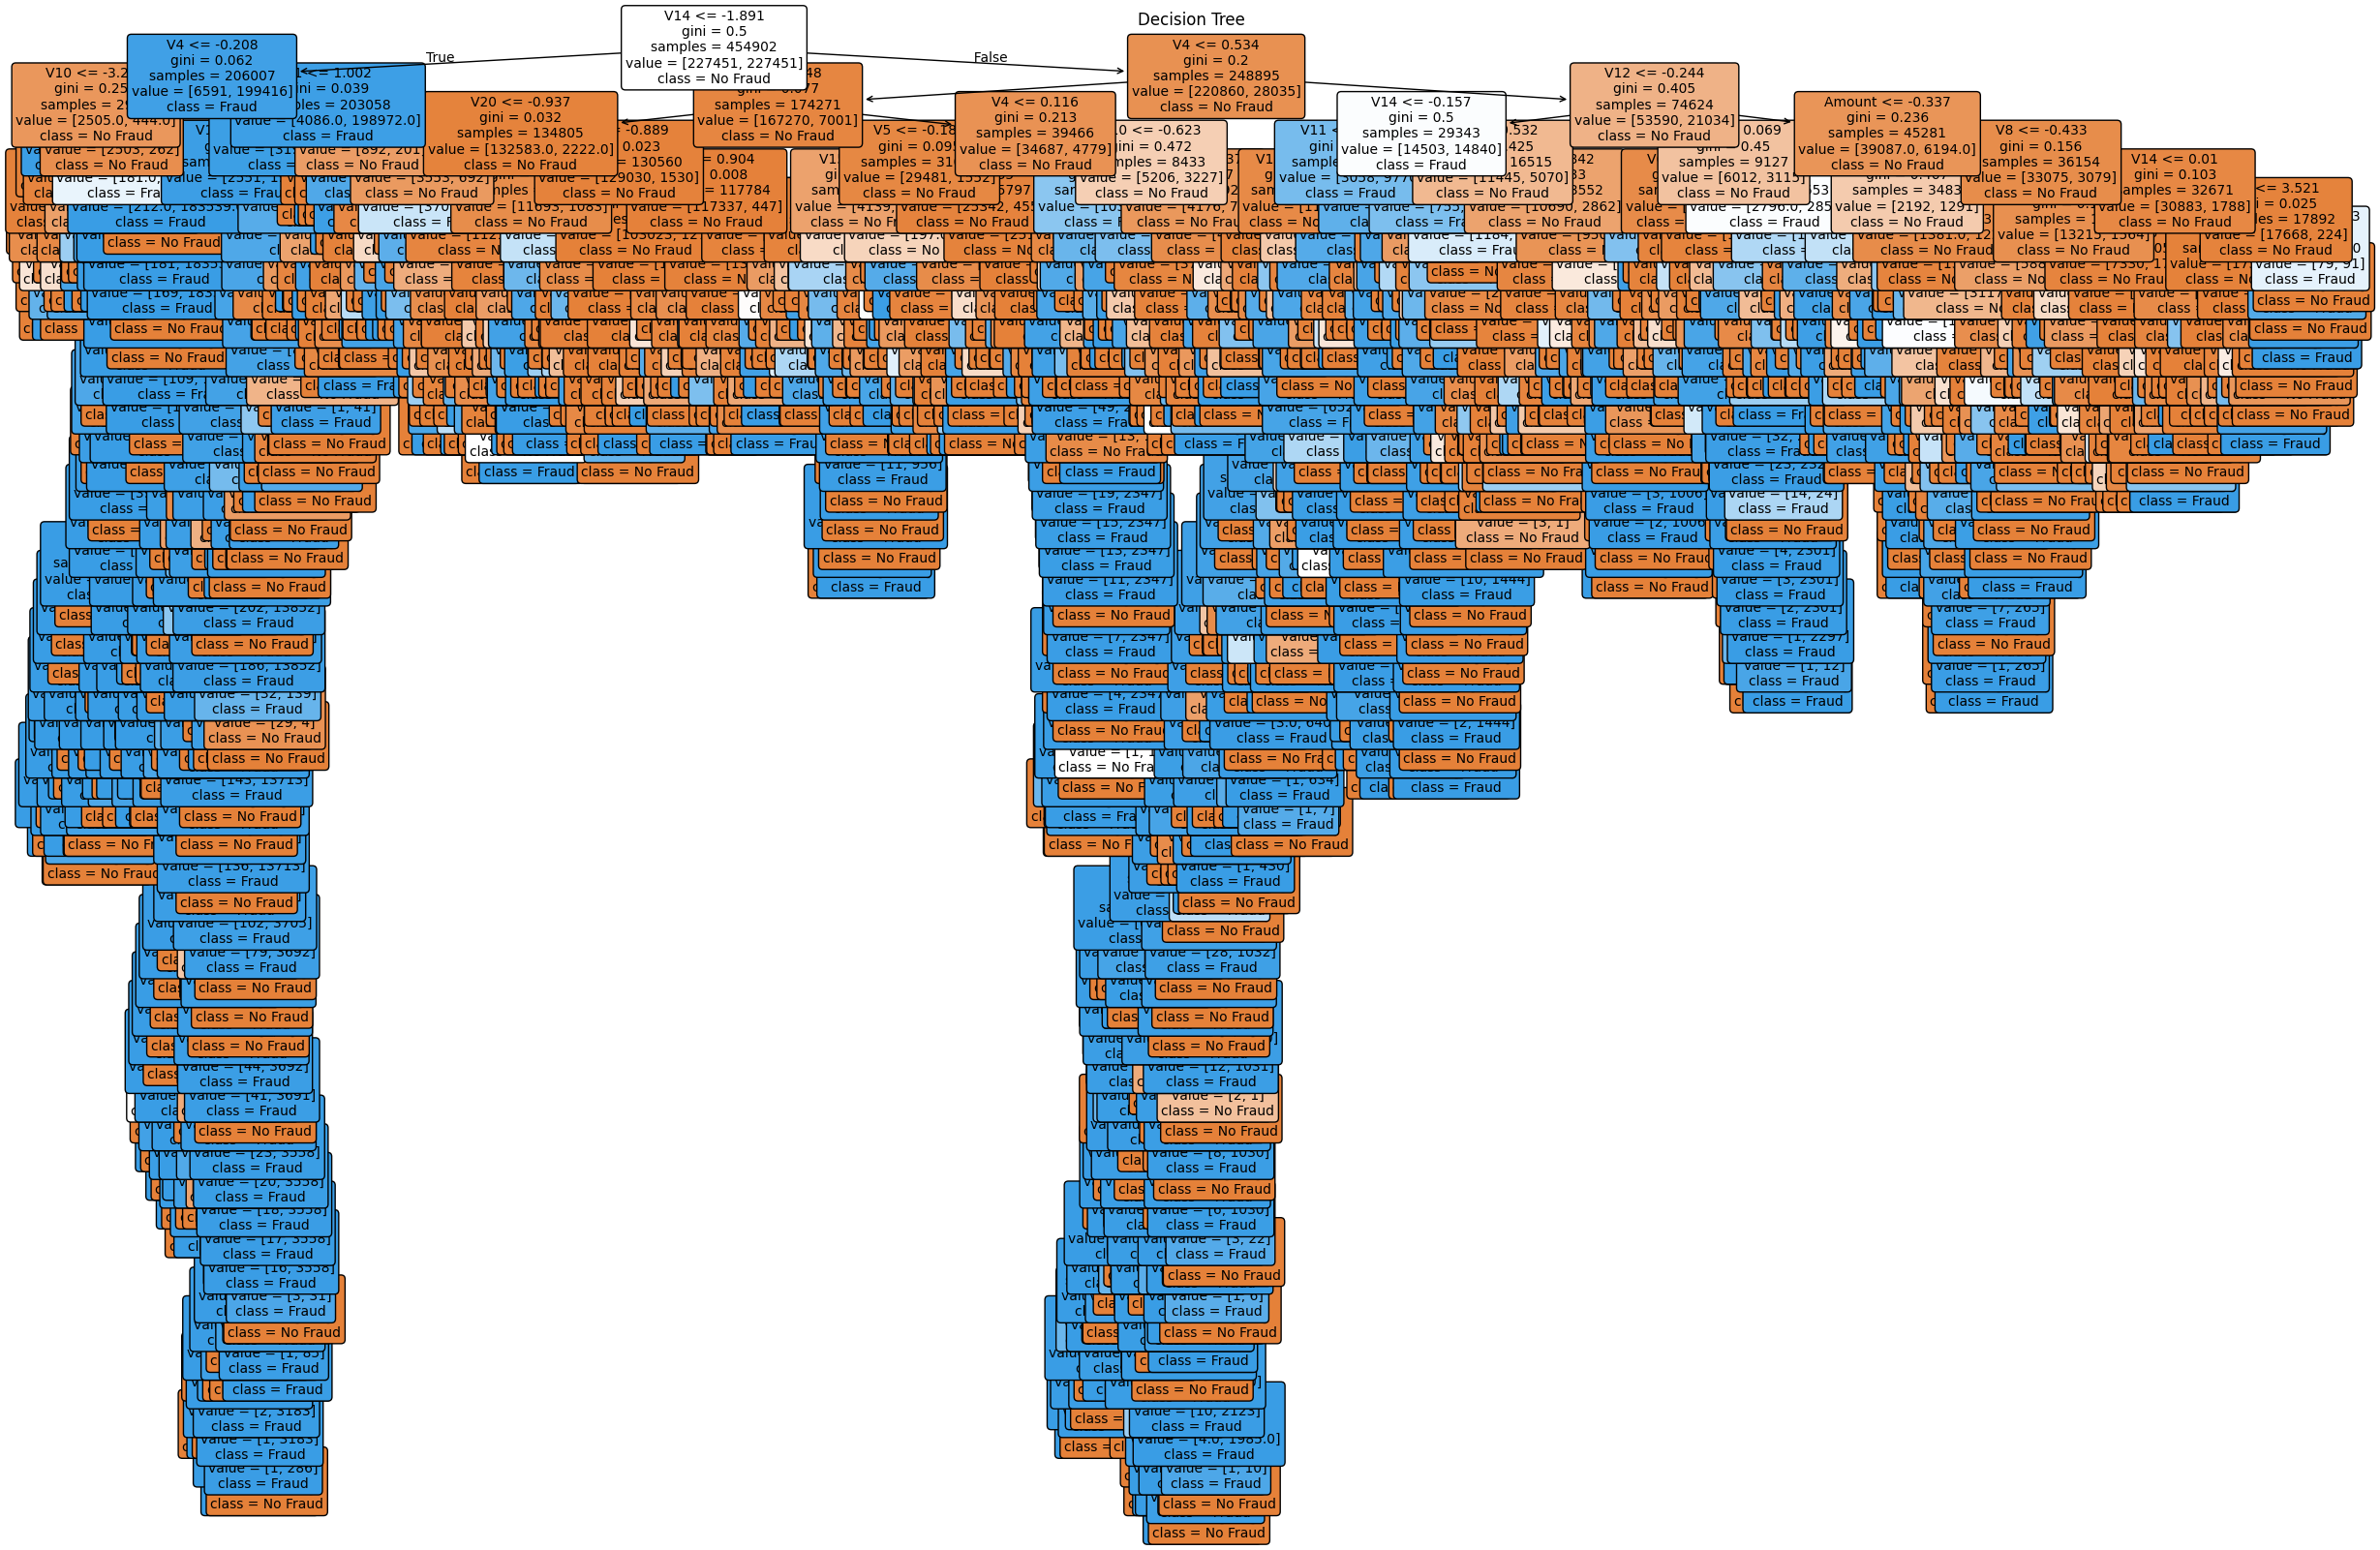

In [ ]:
from sklearn.tree import export_text, plot_tree

#Plot the Decision Tree

plt.figure(figsize= (30,20))
plot_tree(
    decision_tree,
    feature_names= x.columns,
    class_names =['No Fraud', "Fraud"],
    filled = True,
    rounded = True,
    fontsize = 10
)

plt.title('Decision Tree')
plt.show()

AI was used to help with the XGB Classifier

**Challenges to Overcome**

One major challenge I faced was the model selection and imbalance in my data. My Class 0 (No Fraud) was 99.83% while Class 1 (Fraud) was 0.17%. This caused overfitting favoring the majority class (No Fraud), so I had to figure out how to use SMOTE within my models to balance this to 50%/50%. After balancing the data, my performance metrics increased to 0.99%.

Another challenge I faced was choosing which models would benefit my data the best. I chose to do Logistsic Regression to help predict the probability for Class 0 and Class 1. This showed the performance metrics (precision, recall, F1 score) of both classes, which were all relatively high for both classes, meaning that the model performs well for both classes. The AUC score (Area under the curve) refers to the Reciever Operating Characteristic (ROC) curve which tells us the model's ability to distinguish between positive and negative classes. Since my AUC score was 96%, this indicates that my model is working well. The model has a 96% probability of correctly ranking a random chosen positive instance higher than a random chosen negative instance.

I also had to get some help from AI and other completed projects about the XGBoost Classifier. It is a machine learning algorithm designed for supervised learning tasks, particulary in classification. It is an implentation of gradient-boosting decision trees optimized for efficiency and performance. Understanding the parameters in the classifier was also a challenge for me. After creating a confusion matrix and classification report for the classifier, we can see that the performance metrics are high with 95% being the lowest for both classes. The confusion matrix showed that 82747 transactions were correctly classified as NoFraud cases. 2548 transactions were the number of NoFraud cases incorrectly classified at Fraud, etc.

Overall, since the original data had so many transactions, it was harder to correctly fit my model so everything performed well. Also, since the features are hidden due to confidentiality, we cannot know what features effected if the transaction was Fraud or NoFraud.

Some future work I could do is use unsupervised learning like K-Means to identify mroe patterns in the data or implement time series models to simulate real time fraud detection scenarios.